In [10]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = r"C:\Users\m7md7\Desktop\Facial expression\images\train"
TEST_DIR = r"C:\Users\m7md7\Desktop\Facial expression\images\validation"

In [4]:
df = pd.read_csv(r"C:\Users\m7md7\Desktop\fer2013\fer2013.csv") #read dataset

df.head(5),df.shape  #first five rows and count of rows and columns

(   emotion                                             pixels     Usage
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training,
 (35887, 3))

In [5]:
print("Null values present in the file:",df.isna().sum().sum())
print("Basic information about the dataframe:")
df.info()

df.describe()

Null values present in the file: 0
Basic information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
emotions = { #list of available emotions in the dataset
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Sad",
    5:"Surprize",
    6:"Neutral"
}

In [7]:
count_emotions = (df.groupby(df['emotion'])['pixels'].count()).to_frame()
count_emotions['emotion name'] = [emotions[k] for k in emotions.keys()]
count_emotions

,pixels,emotion name
emotion,,
0,4953,Angry
1,547,Disgust
2,5121,Fear
3,8989,Happy
4,6077,Sad
5,4002,Surprize
6,6198,Neutral


In [8]:
count_usage = (df.groupby(df['Usage'])['pixels'].count()).to_frame()
count_usage

,pixels
Usage,
PrivateTest,3589
PublicTest,3589
Training,28709


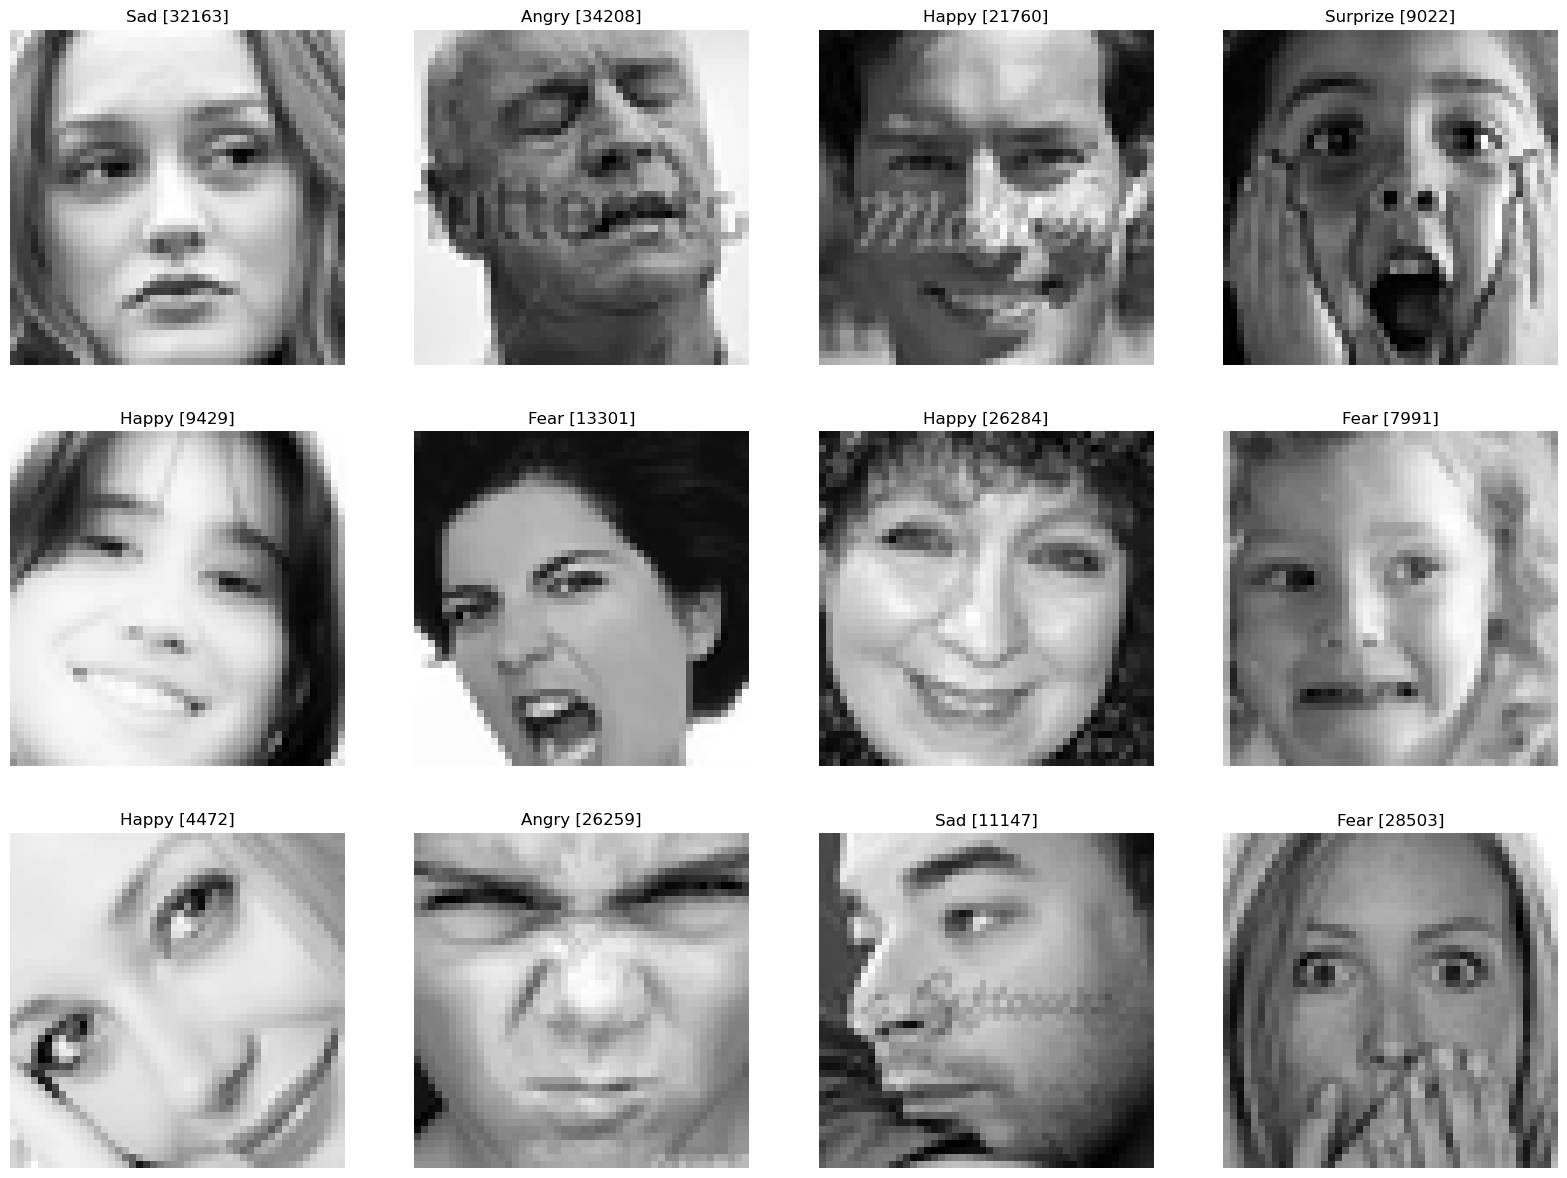

In [11]:
def visualize_images(n_img=4):
    indices = np.random.randint(0,df.shape[0],size=n_img)
#     print(indices)
    plt.figure(figsize=(20,20))
    for i,l in zip(indices,range(0,len(indices))):
        image_ar = np.array([i for i in  df['pixels'][i].split()] , dtype='float')
        pixels = np.reshape(image_ar,(48,48))
        ax = plt.subplot(4,4,l+1)
        plt.imshow(pixels,cmap='gray')
        plt.title(emotions[df['emotion'][i]]+" ["+str(i)+"]")
        plt.xticks()
        plt.yticks([])
        plt.axis("off")
visualize_images(12)

In [16]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [17]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [18]:
print(train)

                                                   image     label
0      C:\Users\m7md7\Desktop\Facial expression\image...     angry
1      C:\Users\m7md7\Desktop\Facial expression\image...     angry
2      C:\Users\m7md7\Desktop\Facial expression\image...     angry
3      C:\Users\m7md7\Desktop\Facial expression\image...     angry
4      C:\Users\m7md7\Desktop\Facial expression\image...     angry
...                                                  ...       ...
28816  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28817  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28818  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28819  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
28820  C:\Users\m7md7\Desktop\Facial expression\image...  surprise

[28821 rows x 2 columns]


In [19]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [20]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\m7md7\Desktop\Facial expression\image...     angry
1     C:\Users\m7md7\Desktop\Facial expression\image...     angry
2     C:\Users\m7md7\Desktop\Facial expression\image...     angry
3     C:\Users\m7md7\Desktop\Facial expression\image...     angry
4     C:\Users\m7md7\Desktop\Facial expression\image...     angry
...                                                 ...       ...
7061  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7062  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7063  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7064  C:\Users\m7md7\Desktop\Facial expression\image...  surprise
7065  C:\Users\m7md7\Desktop\Facial expression\image...  surprise

[7066 rows x 2 columns]
0       C:\Users\m7md7\Desktop\Facial expression\image...
1       C:\Users\m7md7\Desktop\Facial expression\image...
2       C:\Users\m7md7\Desktop\Facial expression\image...
3       C

In [21]:
from tqdm.notebook import tqdm

In [22]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [23]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\m7md7\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [24]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [52]:
x_train = train_features/255.0
x_test = test_features/255.0

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [28]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [29]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [53]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\m7md7\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 2, validation_data = (x_test,y_test)) 

Epoch 1/2
226/226 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.7411 - loss: 0.7131 - val_accuracy: 0.6366 - val_loss: 1.0300
Epoch 2/2
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.7438 - loss: 0.7148 - val_accuracy: 0.6344 - val_loss: 1.0302


In [61]:
model.save('my_model74.keras')

In [55]:
from keras.models import load_model

model = load_model(r"C:\Users\m7md7\Desktop\my_model02.keras")


In [62]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [64]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [65]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\sad\580.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
model prediction is  sad


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
model prediction is  sad


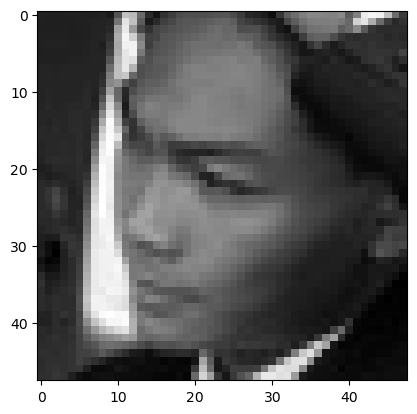

In [67]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\sad\1026.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is  fear


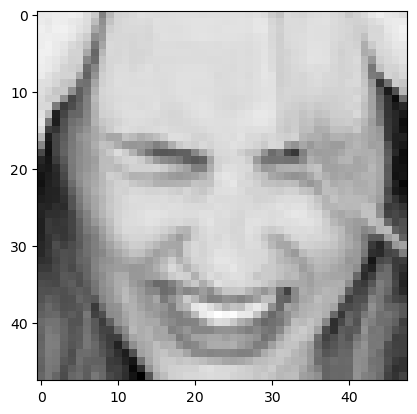

In [68]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\fear\297.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is  angry


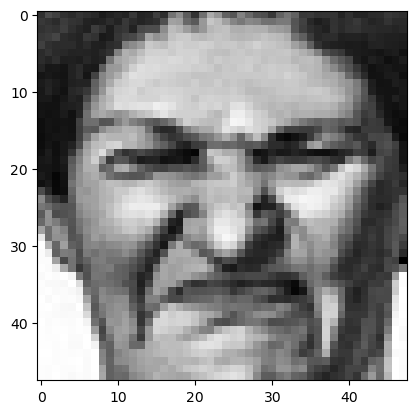

In [69]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\disgust\7192.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
model prediction is  happy


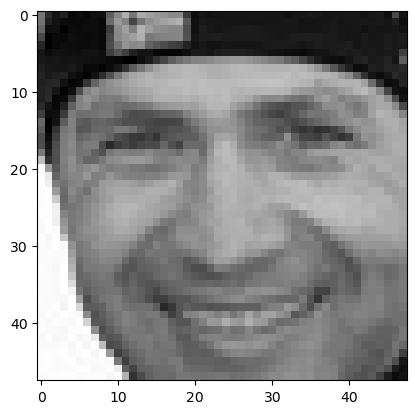

In [70]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\happy\5269.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is  surprise


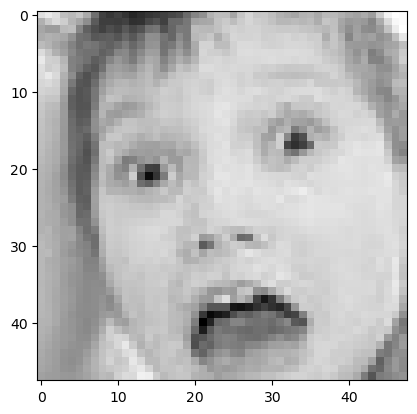

In [71]:
image = r"C:\Users\m7md7\Desktop\Facial expression\images\validation\surprise\2759.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [72]:
import cv2
from keras.models import load_model
import numpy as np

model = load_model(r"C:\Users\m7md7\Desktop\my_model02.keras")

haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

webcam = cv2.VideoCapture(0)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    ret, im = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(im, 1.3, 5)
    try: 
        for (p, q, r, s) in faces:
            image = gray[q:q+s, p:p+r]
            cv2.rectangle(im, (p, q), (p+r, q+s), (255, 0, 0), 2)
            image = cv2.resize(image, (48, 48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))
        cv2.imshow("Output", im)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    except cv2.error:
        pass

webcam.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━